In [54]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default') #스타일 서식 지정

           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


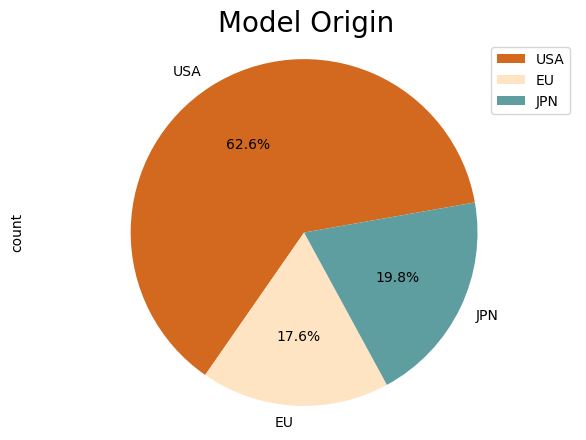

In [55]:
#read_csv()로 df 생성
df = pd.read_csv('auto-mpg.csv',header=None)

#열이름 지정
df.columns =['mpg','cylinders','displacement','horsepower','weight',
             'acceleration','model year','origin','name']
             #데이터개수 카운트를 위해 값1을 가진 열 추가
df['count'] = 1
df_origin = df.groupby('origin').sum()
print(df_origin.head())

#제조국가 origin 값을 실제 지역명으로 변ㄱㅇ
df_origin.index = ['USA','EU','JPN']

#제조국가origin 열에 대한 파이 차트 그리기 - count 열 데이터 사용
df_origin['count'].plot(kind='pie',
                        figsize=(7,5),
                        autopct='%1.1f%%',
                        startangle=10,
                        colors=['chocolate','bisque','cadetblue']
                      )
plt.title('Model Origin',size=20)
plt.axis('equal')
plt.legend(labels=df_origin.index,loc='upper right')
plt.show()

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

#matplotlib 한글 폰트 어쩌고
from matplotlib import font_manager, rc
font_path ="malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

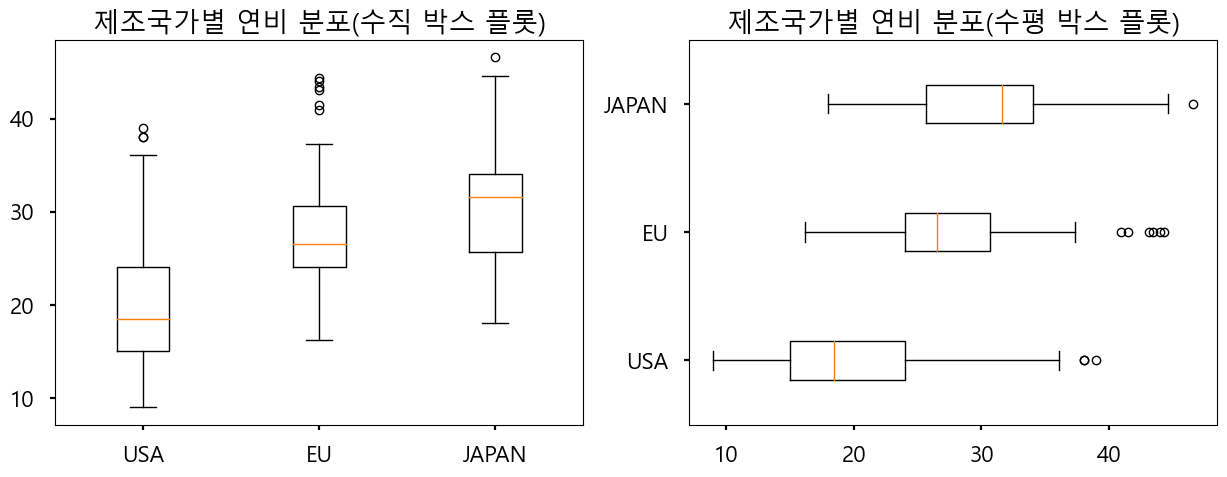

In [57]:
plt.style.use('seaborn-poster')
plt.rcParams['axes.unicode_minus'] = False

#read_csv
df = pd.read_csv('auto-mpg.csv',header=None)

#열이름 지정
df.columns= ['mpg','cylinders','displacement','horsepower','weight',
             'acceleration','model year','origin','name']

#그래프 객체 생성 ( figure에 서프플롯 두개 생성)
fig = plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#axe 객체에 boxplot 메소드로 그래프 출력
ax1.boxplot(x=[df[df['origin']==1]['mpg'],
              df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
               labels=['USA','EU','JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
              df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
               labels=['USA','EU','JAPAN'],
           vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()

In [58]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [59]:
# 라이브러리 불러오기..seaborn에  타이타닉 데이터셋 있다네?
import seaborn as sns

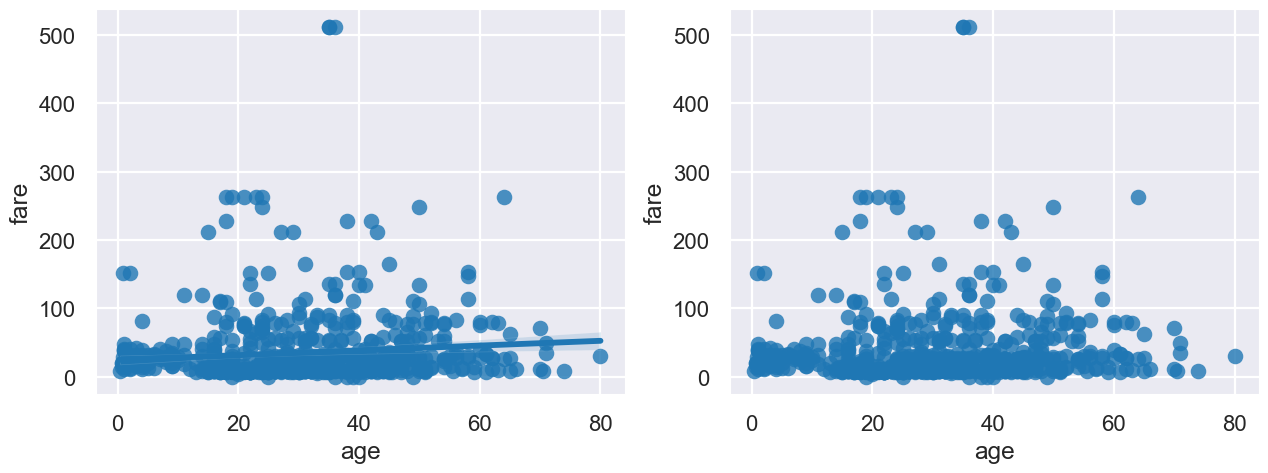

In [60]:
#seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

#스타일 테마 설정
sns.set_style('darkgrid')

#그래프 객체 생성 ( figure네 서브플롯 두개)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#그래프 그리기 선형회귀선 표시 
sns.regplot(x='age', #x축 변수
           y='fare', #y축 변수
            data=titanic, #데이터
            ax=ax1) #axe객체 - 1째 그래프

#그래프 그리기 선형회귀선 미표시 
sns.regplot(x='age', #x축 변수
           y='fare', #y축 변수
            data=titanic, #데이터
            ax=ax2,#axe객체 - 2째 그래프
           fit_reg=False) #회귀선 미표시
plt.show()

C:\Users\jumin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jumin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\jumin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

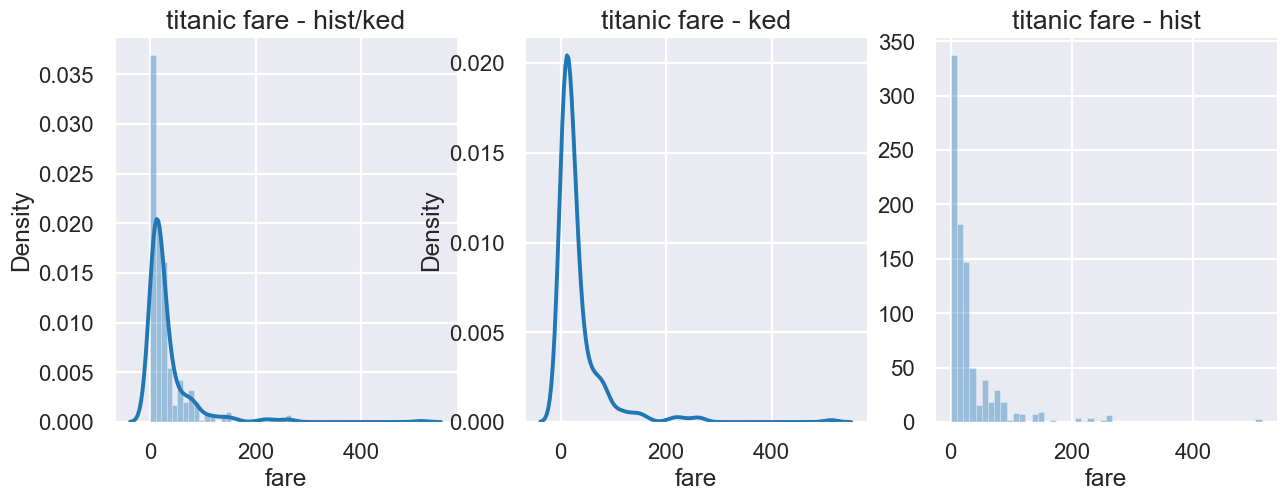

In [61]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2= fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

#기본값
sns.distplot(titanic['fare'],ax=ax1)

#hist=  False
sns.distplot(titanic['fare'],hist=False,ax=ax2)

#kde = False
sns.distplot(titanic['fare'],kde=False,ax=ax3)

#차트 제목 표시
ax1.set_title('titanic fare - hist/ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')

plt.show()

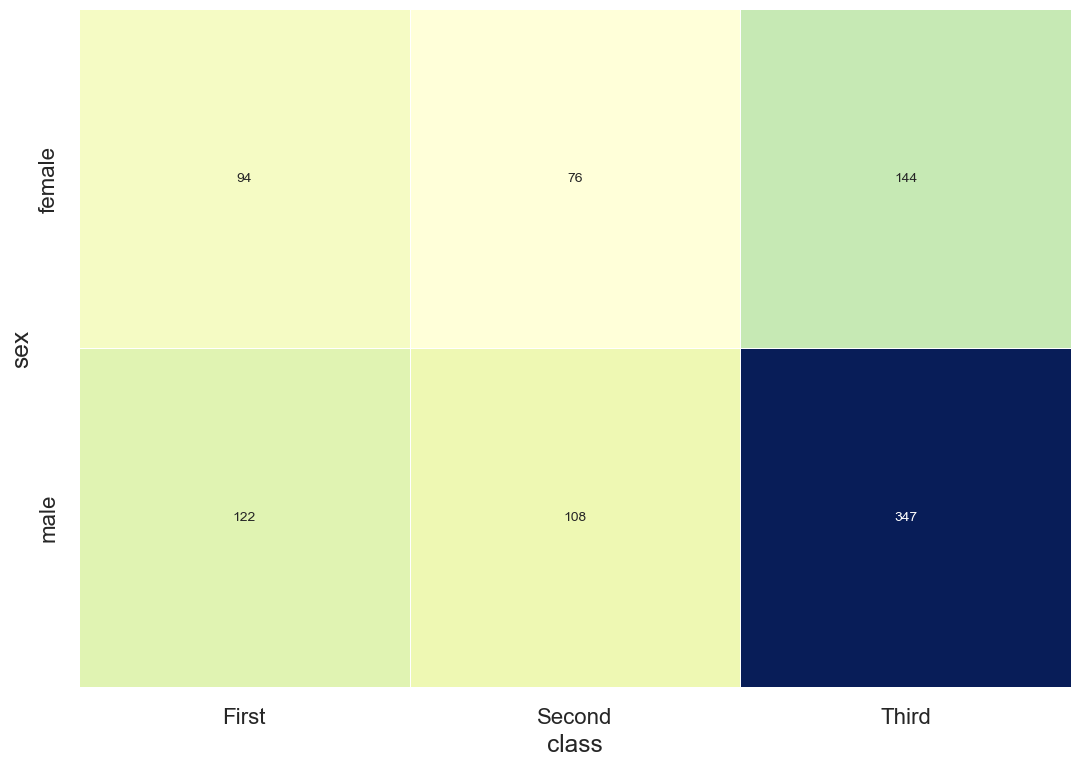

In [62]:
#피벗 테이블로 범주형 변수를 각각 행,열로 재구분하여 정리
table = titanic.pivot_table(index=['sex'],columns=['class'],aggfunc='size')

#히트맵 그리기
sns.heatmap(table, #데이터프레임
           annot=True, fmt='d', # 데이터값 표시 여부, 정수형 포멧
           cmap = 'YlGnBu',#컬러 맵
           linewidth=.5,#구분 선
           cbar=False)#컬러 바 표시 여부

plt.show()

C:\Users\jumin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


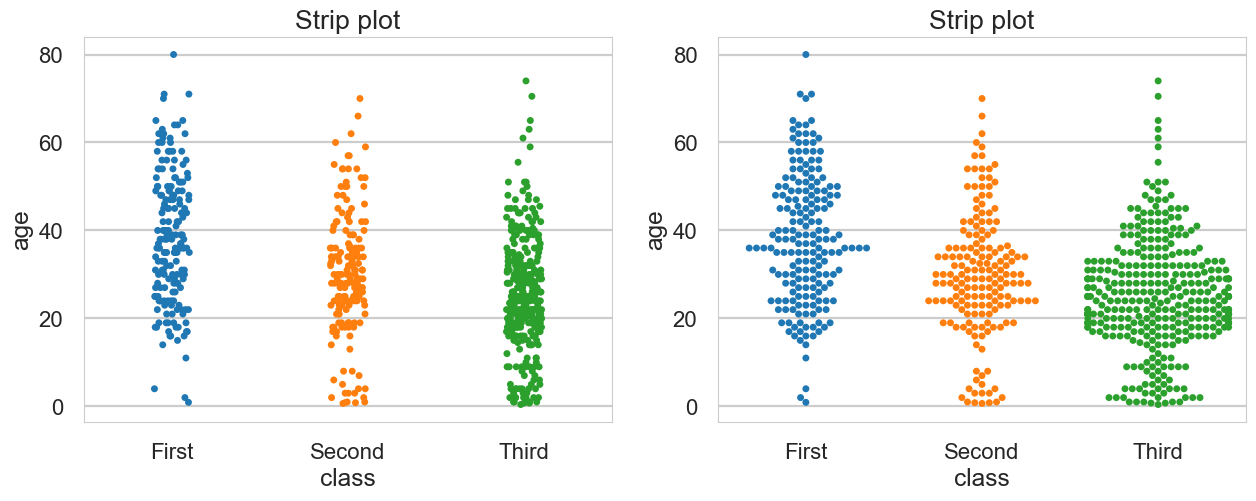

In [63]:
#seaborn 제공데이터셋 가져오기 
titanic = sns.load_dataset('titanic')

#스타일 테마 설정
sns.set_style('whitegrid')

#그래프 객체 생성 
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#이산형 변수의 분포 - 데이터 분산 미고려
sns.stripplot(x='class',
             y='age',
             data=titanic,
             ax=ax1)

#이산형 변수의 분포 - 데이터 분산 고려 
sns.swarmplot(x='class',
             y='age',
             data=titanic,
             ax=ax2)

#챠트 제목표시
ax1.set_title('Strip plot')
ax2.set_title('Strip plot')

plt.show()

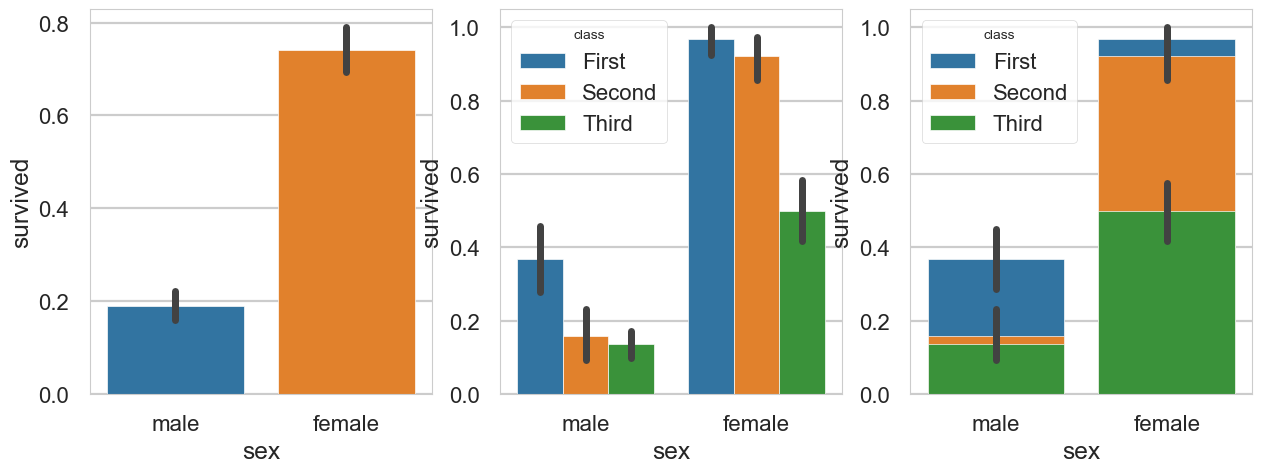

In [64]:
#그래프 객체 생성 
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

#x축 y축 변수 할당
sns.barplot(x='sex',y='survived',data=titanic,ax=ax1)

#x축 y축 변수 할당하고 hue
sns.barplot(x='sex',y='survived',hue='class',data=titanic,ax=ax2)

#x축 y축 변수 할당하고 hue
sns.barplot(x='sex',y='survived',hue='class',dodge=False, data=titanic,ax=ax3)

plt.show()


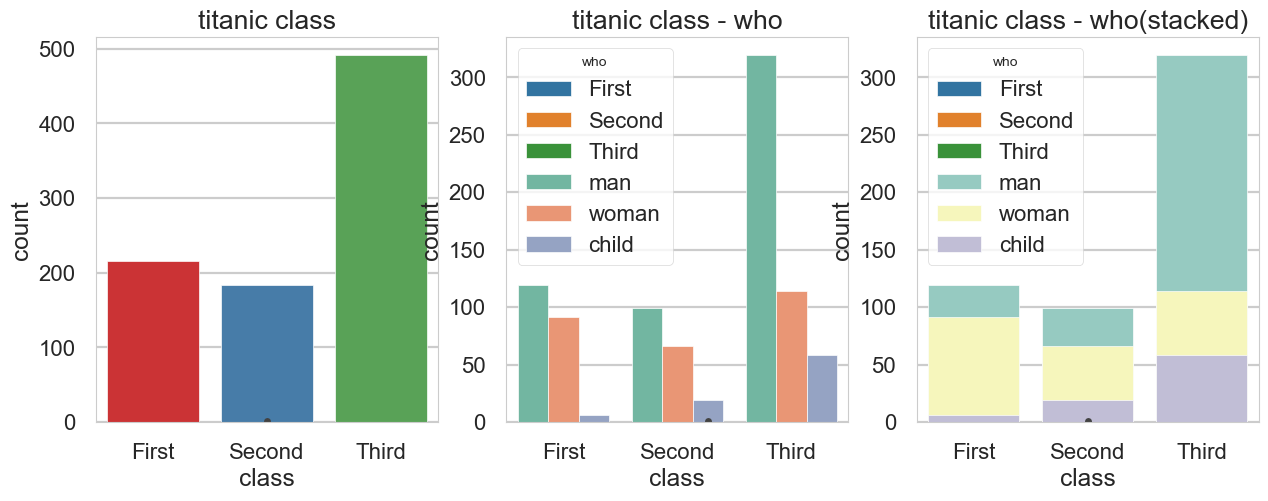

In [66]:
#그래프 객체 생성 
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

#x축 y축 변수 할당
sns.barplot(x='sex',y='survived',data=titanic,ax=ax1)

#x축 y축 변수 할당하고 hue
sns.barplot(x='sex',y='survived',hue='class',data=titanic,ax=ax2)

#x축 y축 변수 할당하고 hue
sns.barplot(x='sex',y='survived',hue='class',dodge=False, data=titanic,ax=ax3)

#기본값
sns.countplot(x='class',palette='Set1',data=titanic,ax=ax1)

#hue 옵션에 who 추가
sns.countplot(x='class', hue='who', palette='Set2',data=titanic,ax=ax2)

#dodge=  False 옵션추가  (축방향으로 분리하지 않고 누적 그래프 )
sns.countplot(x='class',hue='who',palette='Set3',dodge=False,data=titanic,ax=ax3)

#챠트 제목 표시
ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()